# Homework 3

This skeleton of a notebook should get you started on the first part, in which you will have to mask data and handle outliers.  I have included code to make a plot to visualize the data.  

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt

plt.style.use('phys240.mplstyle')

This plot shows real data from the *Gaia* satellite.  There are a number of fields in this table, which you can access as shown.  I have printed out the names below the short block of code.  You'll use a few of these; I define them below:

`pmra`: motion across the sky (think $x$ direction), measured in angular units per time.  For example, a star moving at 1 milliarcsecond per year (funny astronomer units) would take 3.6 million years to travel one degree across the sky.

`pmdec`: same as `pmra`, but in the $y$ direction

`ra`, `dec`: position in the sky (don't worry too much about these)

`parallax`: position shift due to the changing perspective of the Earth through the year.  As the Earth moves around the Sun, the apparent positions of the stars change relative to a background very far away.  The distance is related to parallax by 

${\rm distance~in~parsecs} = 1000/{\rm parallax~in~milliarcseconds}$

The parallaxes here are given in units of milliarcseconds.  A parsec (another astronomer unit) is about 3.26 light years, or $3.0857 \times 10^{18}\,$cm (astronomers also like cgs).

`radial_velocity`: velocity of the star towards us (if negative) or away from us (if positive), measured in km/s.

The data set provided has a few thousand stars in a cluster, and a bunch more stars scattered through space that happen to be near the cluster in projection.  Your tasks will be to estimate which stars are members of the cluster, to estimate the cluster's proper motion, distance from Earth, and internal motion, and to put error bars on these estimates.  You can see the cluster in the figure: it's the patch of dark blue points (parallaxes around 2.5 milliarcseconds) at proper motions of around $-$5 in $x$ and +12 in $y$--a patch in velocity space as represented here.

['source_id', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'radial_velocity', 'radial_velocity_error']


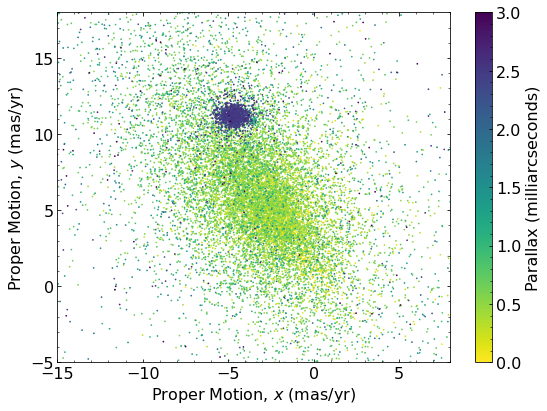

In [2]:
t = fits.open('NGC2516_Gaia.fits.gz')[1].data
print(t.names)
plt.figure(figsize=(8, 6))
plt.scatter(t['pmra'], t['pmdec'], c=t['parallax'], s=0.5, cmap="viridis_r", vmin=0, vmax=3)
plt.xlim(-15, 8)
plt.ylim(-5, 18)
plt.colorbar(label="Parallax (milliarcseconds)")
plt.xlabel(r"Proper Motion, $x$ (mas/yr)")
plt.ylabel(r"Proper Motion, $y$ (mas/yr)")
plt.tight_layout()
plt.savefig("NGC2516_figure.pdf")